In [31]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
%matplotlib inline
#% matplotlib notebook
import warnings
warnings.filterwarnings(action='ignore') 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 선형모델

w[0]: 0.393906  b: -0.031804


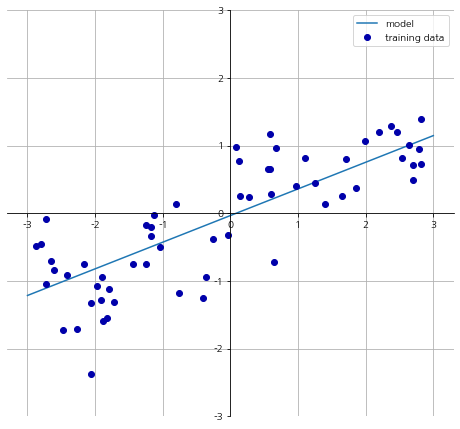

In [32]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)
- 선형회귀(linear regression
- 최소제곱법(OLS, ordinary least squares)

가장 간단하고 오래된 회귀용 선형 알고리즘

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

lr=LinearRegression().fit(X_train,y_train)

- coef_ : 기울기 파라미터(w)는 가주치(weight)또는 계수(coefficient)
- intercept_ : 편향(offset) 또는 절편(intercept)

In [34]:
print("lr.coef_ : ", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_ :  [0.39390555]
lr.intercept_: -0.031804343026759746


In [35]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


현재는 둘의 점수차이가 크지않으므로 과소적합

하지만 특성값이 많아진다면 과대적합이 될 가능성이 높아진다.

In [36]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lr= LinearRegression().fit(X_train, y_train)

In [37]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


### 리지 회귀

w의 모든 원소가 0에 가깝게 되길 원한다. 

규제 (Regularization)
- 모든 특성이 출력에 주는 영향을 최소한으로 만드는것(기울기를 작게 만든다.)
- 과대적합이 되지 않도록 모델을 강제로 제한
- 리지 회귀에서는 L2규제 사용

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수 : 0.75


훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높다
- 더 일반화 된 모델이라는 의미

In [39]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수 : 0.64


alpha를 매개변수로 훈련세트의 성능대비 모델을 얼마나 단순화 할지 정할수 있음 
- default : 1.0
- 높은 alpha값은 더 제약을 높게 한다.

In [40]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수 : 0.77


- alpha값에 따라 coef_속성이 어떻게 달라지는지를 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있다

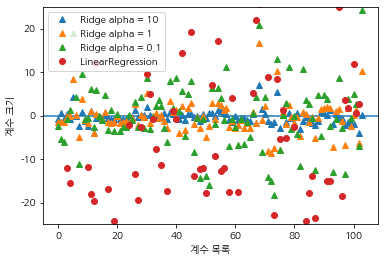

In [41]:
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge.coef_, '^', label = 'Ridge alpha = 1')
plt.plot(ridge01.coef_, '^', label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_,'o', label  = "LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

- alpha값이 클수록 x값이 크게 변화하여도 y값에서 변화가 없고, 선형회귀계수(alpha = 0)은 그래프 밖으로 나간다.

규제의 효과를 이해하는 또다른 방법 
- alpha를 고정하고 훈련데이터를 변화 
- 데이터 셋의 크기에 따른 모델의 성능변화를 나타낸 그래프(학습곡선)

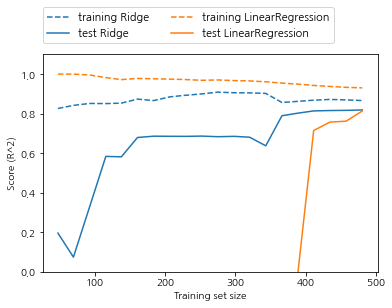

In [42]:
mglearn.plots.plot_ridge_n_samples()

이 그래프에서 알 수 있는것 
- 데이터셋 400미만에서는 선형회귀는 어떤것도 학습하지 못하고 있음
- 데이터를 충분히 주면 규제항은 덜 중요해져서 리지 회귀와 선형회귀의 성능이 같아질 것이라는 것
- 훈련데이터 선응이 감소하는 것도 흥미로운데 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

### 라소(Lasso)

규제를 적용하는 Ridge의 대안으로 Lasso가 있다.
- 계수를 0에 가깝게 만들려고 하지만 방식이 조금 다르며 이를 L1규제라고 한다.
- L1규제의 결과로 라소를 사용할 때 어떤 계수는 정말로 0이 되고 완전히 제외됨
- 특성선택이 자동으로 이루어 진다고 볼 수 있음

In [43]:
from sklearn.linear_model import Lasso 

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ != 0)) # 104개의 특성중 4개만 사용한 것을 볼 수 있다.

훈련 세트 점수: 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


- alpha 기본값 1.0
- 위에는 과소적합이므로 alpha값을 줄여보자
- 또한 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야한다.

In [44]:
# "max_iter"기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso001.coef_ != 0)) # 104개의 특성중 4개만 사용한 것을 볼 수 있다.

훈련 세트 점수: 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33


- 아래와 같이 alpha값을 너무 낮추면 규제의 효과가 사라져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

In [45]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0)) # 104개의 특성중 4개만 사용한 것을 볼 수 있다.

훈련 세트 점수: 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96


Text(0, 0.5, '계수 크기')

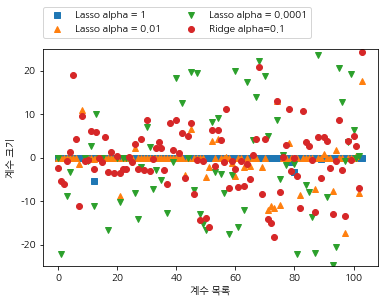

In [46]:
plt.plot(lasso.coef_, 's', label = 'Lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha = 0.0001')

plt.plot(ridge01.coef_,'o', label  = "Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

alpha=0.1인 Ridge 모델은 alpha=0.01인 라소 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다. 
- 이 두 모델 중 보통은 리지회귀를 선호한다. 
- 하지만 분석하기 쉬운 모델을 원한다면 Lasso가 입력특성 울 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 준다. 

scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공
- 더 좋은 성능을 내지만 L1규제와 L2규제를 위한 매개변수 두개를 조정해야 한다.

### 분류형 선형모델

이진분류(binary classification)
- 선형회귀(가중치의 합을 그냥 사용)
- 이진분류(0보다 작으면 -1 0보다 크면 1)이라고 예측


선형모델을 학습시키는 알고리즘 
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

#### Logistic regression
Regression(회귀)가 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘이므로 Linear regression과 혼동하면 안된다

#### LinearSVC(support vector machine)

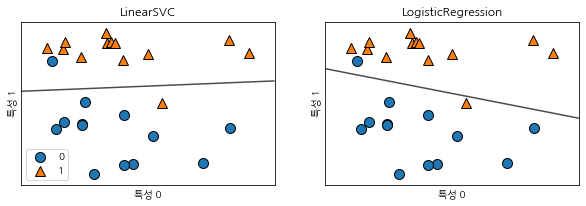

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge() 

fig, axes = plt.subplots(1,2, figsize = (10,3))

for model , ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

위 두 모델은 기본적으로 L2 규제를 사용

- 규제의 강도를 결정하는 매개변수는 C / C의 값이 높아지면 규제가 감소한다.
- C의 작동 방식
    - 높은 C값을 설정하면 훈련세트에 가능한 최대로 맞추려고하고 
    - C값을 낮추면 계수 벡터(w)가 0에 가까워지도록 만든다

- 다른 설명 방식
    - C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고한다. 
    - C의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 노력한다

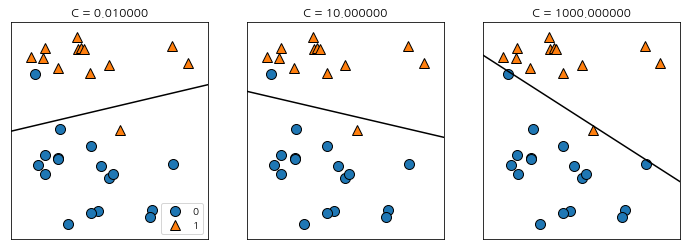

In [49]:
mglearn.plots.plot_linear_svc_regularization()

- C의 경우는 과대적합이라고 볼 수 있다
- 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요해진다.

In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42) 
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.958


기본값 C = 1 양쪽 0.95로 훌륭한 성능 
- 하지만 훈련/테스트 세트의 성능이 매우 비슷하므로 과소적합 
- 모델의 제약을 더 풀어주기 위해 C를 증가

In [52]:
logreg100 = LogisticRegression(C = 100, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.979
테스트 세트 점수 : 0.965


C = 100을 사용하니 훈련 세트 정확도 높아지고, 테스트 세트의 정확도도 조금 증가 
- 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.

규제를 더 강하게 C = 0.01로 한다면 어떻게 될까

In [53]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


- 과소 적합된 모델에서 왼쪽으로 더 이동하므로 훈련세트와 테스트 세트의 정확도는 default보다 더 낮아진다.

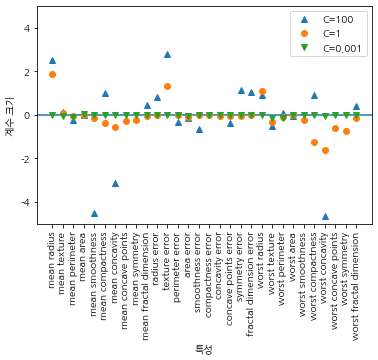

In [55]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()


세번째 계수('mean perimeter')
- C = 100, 1 일때는 양수 
- C = 0.001 일때는 음수 

    - 계수의 부호가 바뀌는 것으로 보아 높은 'mean perimeter'값은 양성이나 악성의 신호 모두가 될 수 있음
    - 선형 모델의 계수는 항상 의심하고 조심해서 해석해야 한다.

- 더 이해하기 쉬운 모델을 원한다면(모델이 몇개의 특성만 사용하게 되겠지만) L1 규제를 사용하는 것이 좋다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


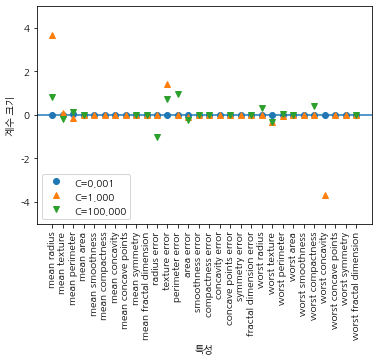

In [56]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

참고 
- 사이킷런 0.22 버전부터 LogisticRegression의 solver 매개변수 기본값이 lbfgs로 변경
- 이 방식은 L1규제를 사용하지 못하므로 solver = 'liblinear'를 지정해야 한다.

- 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수

### 다중 클래스 분류용 선형 모델 

로지스틱 회귀만 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원
- 다중 클래스를 지원하지 않음
- 다중 클래스 분류 알고리즘으로 확장하는 보편적인 방법은 일대다(one-vs.-rest)방법

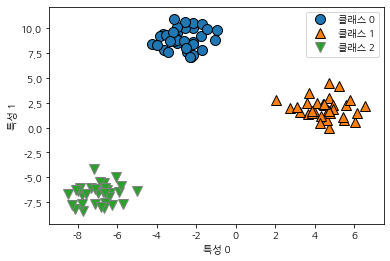

In [57]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

- 이 데이터 셋을 LinearSVC 분류기로 훈련


In [58]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


- 3개의 이진 분류기가 만드는 경계를 시각화

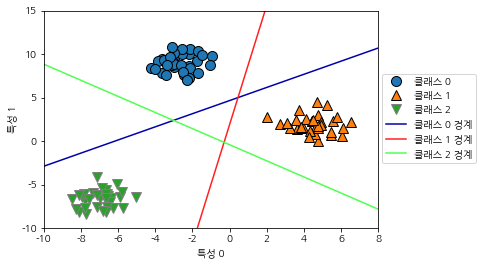

In [59]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

중앙의 삼각형은 어떤 클래스로 분류?
- 분류 공식의 결과가 가장 높은 클래스 / 가장 가까운 직선의 클래스가 된다.


- 2차원 평면의 모든 포인트에 대한 예측결과를 보여준다

Text(0, 0.5, '특성 1')

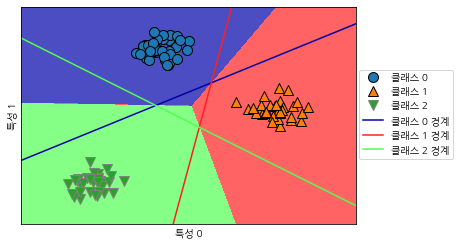

In [60]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 장단점과 매개변수

선형 모델의 주요 매개변수
- 회귀 모델 : alpha
- LinearSVC, LogisticRegression : C
    - 보통 C와 alpha는 로그 스케일로 최적치를 정한다.(ex)0.01, 0.1, 1, 10 

L1 vs L2
- 중요한 특성이 많지 않다고 생각하면 L1규제를 사용 
- 그렇지 않으면 기본적으로 L2규제를 사용해야 한다.

- 선형 모델은 학습 속도가 빠르고 예측도 빠르다
- 매우 큰 데이터셋과 희소한 데이터 셋에서도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 
기본설정보다 빨리 처리하도록 LogisticRegressio과 Ridge에 solver = 'sag'옵션을 준다
- 다른 대안으로 대용량 처리버전으로 구현된 SGDClassifier와 SGDRegressor를 사용할 수 있다. 

sag(Stochastic Average Gradient Descent)(확률적 평균 경사 하강법)의 약자로서 경사 하강법과 비슷하지만, 반복이 진행될 때 이전에 구한 모든 경사 평균을 사용하여 계수를 갱신합니다
- scikit-learn 0.19버전에서는 sag성능을 개선한 saga 알고리즘이 추가 
- https://goo.gl/TLyqdo 참고

- 선형 모델의 또 하나의 장점은 앞서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다는 것
- 하지만 데이터의 특성이 서로 깊게 연관되어 있을 때 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있다.
- 그럴땐 계수를 분석하기가 매우 어렵다

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터 셋에서도 선형 모델을 많이 사용

- 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다

